In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
tracts_demo = gpd.read_file('../Data/tract_with_info_v2.shp')
tracts_demo.set_index('Tract',inplace=True)
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,...,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
Tract,,,,,,,,,,,,,,,,,,,,,
36005020000,4711,3310,2.759499,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,...,Bronx,E,020000,200,BX37,Van Nest-Morris Park-Westchester Square,3704,3.681096e+06,11070.413845,"POLYGON ((-73.84494 40.84822, -73.84489 40.847..."
36005020501,6976,5313,1.046445,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,...,Bronx,E,020501,205.01,BX36,University Heights-Morris Heights,3707,2.949066e+06,7565.836415,"POLYGON ((-73.92213 40.85048, -73.92168 40.850..."
36005020502,2160,1737,1.666667,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,...,Bronx,E,020502,205.02,BX36,University Heights-Morris Heights,3707,1.087824e+06,4437.182156,"POLYGON ((-73.91825 40.85303, -73.91797 40.852..."
36005020900,4287,3297,3.825519,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,...,Bronx,E,020900,209,BX63,West Concourse,3708,1.424319e+06,5201.927123,"POLYGON ((-73.91192 40.84326, -73.91195 40.843..."
36005021001,8930,7185,2.183651,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,...,Bronx,E,021001,210.01,BX46,Parkchester,3709,2.077080e+06,7202.143926,"POLYGON ((-73.85304 40.84074, -73.85314 40.840..."


In [3]:
tracts_demo['%NonWhite'] = tracts_demo[['%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed']].sum(axis = 1)

In [4]:
tracts_demo.columns

Index(['Pop_Tot', 'Pop_18', '%White', '%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac', 'index',
       'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry', '%NonWhite'],
      dtype='object')

In [5]:
tracts_demo = tracts_demo[['Pop_Tot', 'Pop_18', '%White', '%NonWhite','%Black', '%Hispanic_', '%Asian',
       '%Other', '%Mixed', 'Median_Inc', '%Edu_hs', '%Edu_bac']]
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%NonWhite,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,%Edu_bac
Tract,,,,,,,,,,,,
36005020000,4711,3310,2.759499,97.240501,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,23.685801
36005020501,6976,5313,1.046445,98.953555,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,9.655562
36005020502,2160,1737,1.666667,98.333333,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,17.962003
36005020900,4287,3297,3.825519,96.174481,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,14.922657
36005021001,8930,7185,2.183651,97.816349,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,24.982603


In [6]:
len(tracts_demo)

2055

<AxesSubplot:>

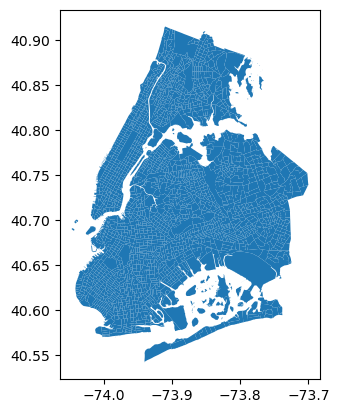

In [7]:
tracts_gdf = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts.shp')
tracts_gdf.plot()

In [8]:
len(tracts_gdf)

2055

In [9]:
tracts_gdf.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct201,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,geoid,Center_Lat,Center_Lon,area_km2,geometry
0,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20030845,1906016.47074,36061009800,40.755788,-73.967775,0.177075,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
1,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,5687.80243891,1860992.68163,36061010200,40.759424,-73.974449,0.172893,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
2,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,5693.03636707,1864600.43538,36061010400,40.760779,-73.977673,0.173228,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
3,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,5699.86064037,1890907.25105,36061011300,40.754775,-73.987870,0.175672,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."
4,130,1,Manhattan,013000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.97295649,1918144.56374,36061013000,40.772736,-73.964734,0.178202,"POLYGON ((-73.96148 40.77432, -73.96194 40.773..."


In [10]:
transit_access=pd.read_csv('../Data/commute_tt_results.csv',index_col=0)
transit_access.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,Bus_Count,Subway_Count,Center_Lat,Center_Lon,area_km2,formatted,CBD1,CBD2,CBD3,CBD4
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,22,3,40.755788,-73.967775,0.177075,40.75578797405885%2C-73.96777472301177,19.0,10.0,33.0,27.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,25,8,40.759424,-73.974449,0.172893,40.759423723208%2C-73.97444938135632,15.0,6.0,30.0,24.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,21,9,40.760779,-73.977673,0.173228,40.760778939480964%2C-73.97767289767248,15.0,5.0,29.0,25.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,21,14,40.754775,-73.987870,0.175672,40.754775073606%2C-73.98786992507925,4.0,6.0,26.0,12.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,12,2,40.772736,-73.964734,0.178202,40.772735996496955%2C-73.96473354620095,32.0,19.0,41.0,35.0


In [11]:
len(transit_access)

2041

In [12]:
#merge
tract_info = transit_access.join(tracts_demo,how = 'left')
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,%White,%NonWhite,%Black,%Hispanic_,%Asian,%Other,%Mixed,Median_Inc,%Edu_hs,%Edu_bac
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,75.458778,24.541222,2.095316,9.832922,10.832649,0.136949,1.643385,129167,95.786940,76.482094
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,54.918033,45.081967,5.737705,11.475410,1.639344,22.950820,3.278689,-666666666,100.000000,67.647059
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,63.008631,36.991369,1.479655,9.001233,19.235512,6.041924,1.233046,125882,97.594937,81.392405
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,15.306122,84.693878,38.775510,0.000000,33.673469,0.000000,12.244898,95313,89.795918,44.897959
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,87.326494,12.673506,0.603500,5.461678,4.345202,0.603500,1.659626,196964,99.309869,83.850932


In [13]:
tract_info['mean_commute']=tract_info[['CBD1','CBD2','CBD3','CBD4']].mean(axis=1)
tract_info['min_commute']=tract_info[['CBD1','CBD2','CBD3','CBD4']].min(axis=1)

perc_ls = ['%White', '%Black', '%Hispanic_', '%Asian','%Other', '%Mixed', '%Edu_hs', '%Edu_bac']
for perc_item in perc_ls:
    col_str = perc_item[1:]
    tract_info[col_str+'Tot'] = tract_info['Pop_Tot']*tract_info[perc_item]/100
    tract_info[col_str+'Above18'] = tract_info['Pop_18']*tract_info[perc_item]/100

In [14]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black',
       '%Hispanic_', '%Asian', '%Other', '%Mixed', 'Median_Inc', '%Edu_hs',
       '%Edu_bac', 'mean_commute', 'min_commute', 'WhiteTot', 'WhiteAbove18',
       'BlackTot', 'BlackAbove18', 'Hispanic_Tot', 'Hispanic_Above18',
       'AsianTot', 'AsianAbove18', 'OtherTot', 'OtherAbove18', 'MixedTot',
       'MixedAbove18', 'Edu_hsTot', 'Edu_hsAbove18', 'Edu_bacTot',
       'Edu_bacAbove18'],
      dtype='object')

In [15]:
tract_info.head()

,ctlabel,boro_code,boro_name,ct2010,boro_ct2010,cdeligibil,ntacode,ntaname,puma,shape_leng,...,AsianTot,AsianAbove18,OtherTot,OtherAbove18,MixedTot,MixedAbove18,Edu_hsTot,Edu_hsAbove18,Edu_bacTot,Edu_bacAbove18
geoid,,,,,,,,,,,,,,,,,,,,,
36061009800,98.0,1,Manhattan,9800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.200308,...,791.0,719.937825,10.0,9.101616,120.0,109.219392,6994.362323,6366.0,5584.722540,5083.0
36061010200,102.0,1,Manhattan,10200,1010200,I,MN17,Midtown-Midtown South,3807,5687.802439,...,2.0,1.672131,28.0,23.409836,4.0,3.344262,122.000000,102.0,82.529412,69.0
36061010400,104.0,1,Manhattan,10400,1010400,I,MN17,Midtown-Midtown South,3807,5693.036367,...,156.0,151.960543,49.0,47.731196,10.0,9.741060,791.494937,771.0,660.092405,643.0
36061011300,113.0,1,Manhattan,11300,1011300,I,MN17,Midtown-Midtown South,3807,5699.860640,...,33.0,33.000000,0.0,0.000000,12.0,12.000000,88.000000,88.0,44.000000,44.0
36061013000,130.0,1,Manhattan,13000,1013000,I,MN40,Upper East Side-Carnegie Hill,3805,5807.972956,...,144.0,125.923959,20.0,17.489439,55.0,48.095957,3291.129055,2878.0,2778.819876,2430.0


In [16]:
type(tract_info)

pandas.core.frame.DataFrame

In [17]:
tract_info['geometry'] = tract_info['geometry'].apply(loads)
tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry',crs = '4326')

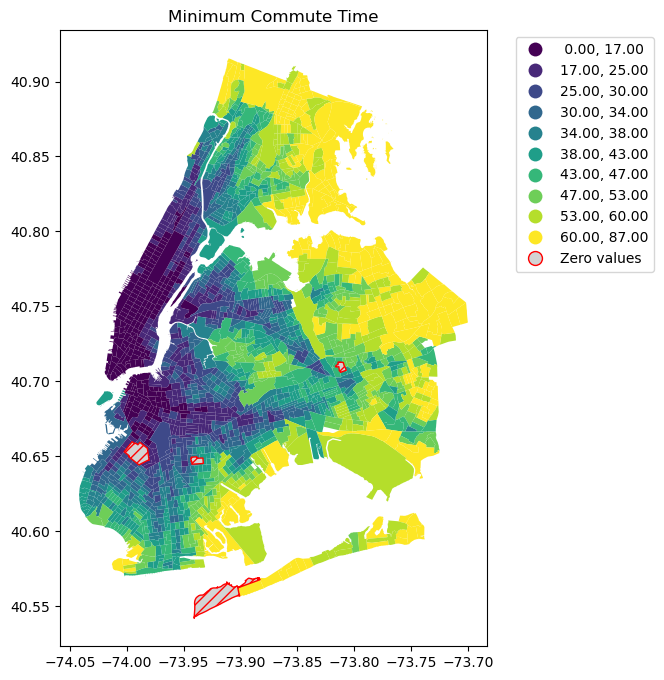

In [18]:
tract_info.plot(column = 'min_commute',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Minimum Commute Time')
plt.show()

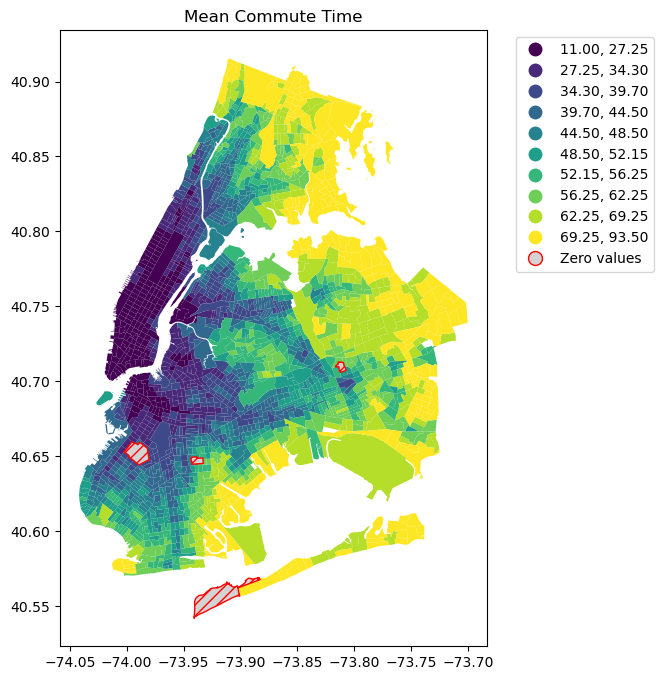

In [19]:
tract_info.plot(column = 'mean_commute',figsize = (10,8), k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})
plt.title('Mean Commute Time')
plt.show()

# SAMI Calculation

In [20]:
tract_info.columns

Index(['ctlabel', 'boro_code', 'boro_name', 'ct2010', 'boro_ct2010',
       'cdeligibil', 'ntacode', 'ntaname', 'puma', 'shape_leng', 'shape_area',
       'geometry', 'Bus_Access', 'Subway_Access', 'Bus_Count', 'Subway_Count',
       'Center_Lat', 'Center_Lon', 'area_km2', 'formatted', 'CBD1', 'CBD2',
       'CBD3', 'CBD4', 'Pop_Tot', 'Pop_18', '%White', '%NonWhite', '%Black',
       '%Hispanic_', '%Asian', '%Other', '%Mixed', 'Median_Inc', '%Edu_hs',
       '%Edu_bac', 'mean_commute', 'min_commute', 'WhiteTot', 'WhiteAbove18',
       'BlackTot', 'BlackAbove18', 'Hispanic_Tot', 'Hispanic_Above18',
       'AsianTot', 'AsianAbove18', 'OtherTot', 'OtherAbove18', 'MixedTot',
       'MixedAbove18', 'Edu_hsTot', 'Edu_hsAbove18', 'Edu_bacTot',
       'Edu_bacAbove18'],
      dtype='object')

In [21]:
len(tract_info)

2041

In [22]:
len(tract_info[tract_info['Median_Inc']<0])

62

In [23]:
tract_info[tract_info['min_commute']==0][['CBD1','CBD2','CBD3','CBD4','Center_Lat','Center_Lon']]

,CBD1,CBD2,CBD3,CBD4,Center_Lat,Center_Lon
geoid,,,,,,
36061002100,13.0,20.0,11.0,0.0,40.714354,-74.01013


In [24]:
tract_info = tract_info.dropna(subset=['Pop_Tot','Pop_18','mean_commute','min_commute','Median_Inc',
                                'WhiteTot', 'WhiteAbove18', 'BlackTot','BlackAbove18','Hispanic_Tot',
                                'Hispanic_Above18', 'AsianTot','AsianAbove18', 'OtherTot', 'OtherAbove18',
                                'MixedTot', 'MixedAbove18','Edu_hsTot', 'Edu_hsAbove18', 'Edu_bacTot', 'Edu_bacAbove18'],how='any')
tract_info = tract_info[tract_info['Pop_Tot']>0]
tract_info = tract_info[tract_info['Median_Inc']>0]
tract_info['mean_commute'] = tract_info['mean_commute'].replace(0, 1)
tract_info['min_commute'] = tract_info['min_commute'].replace(0, 1)

In [25]:
tract_info = tract_info.sort_values(by = 'Pop_Tot')
tract_info[['Pop_Tot','Pop_18','Median_Inc','mean_commute']].head()

,Pop_Tot,Pop_18,Median_Inc,mean_commute
geoid,,,,
36061009400,71,71,150893,18.50
36061011300,98,98,95313,12.00
36061010900,172,149,167750,16.00
36061009600,177,177,130500,17.75
36047054300,283,258,116875,35.50


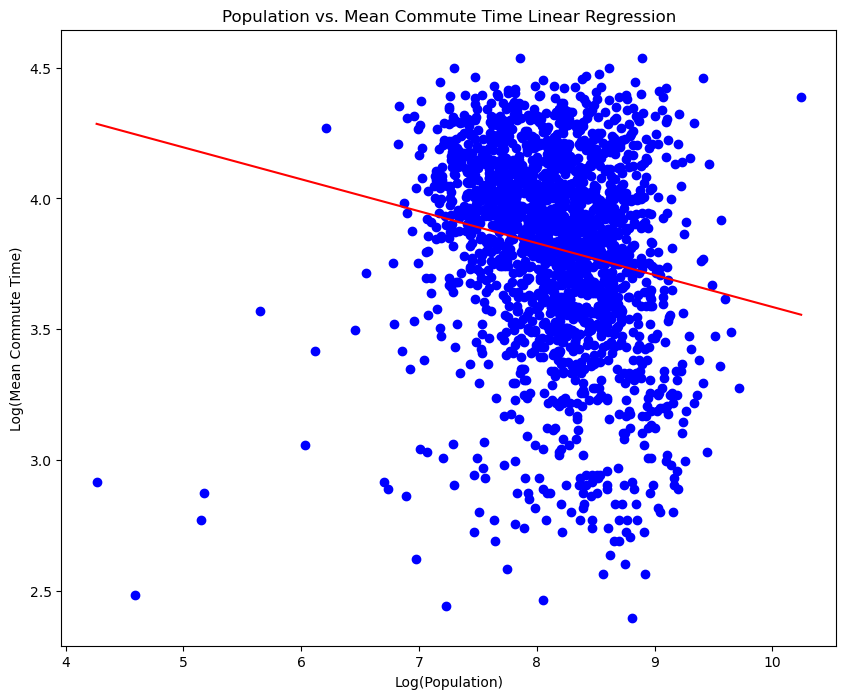

In [26]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Pop_Tot'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['mean_commute'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Population)')
ax.set_ylabel('Log(Mean Commute Time)')
ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()


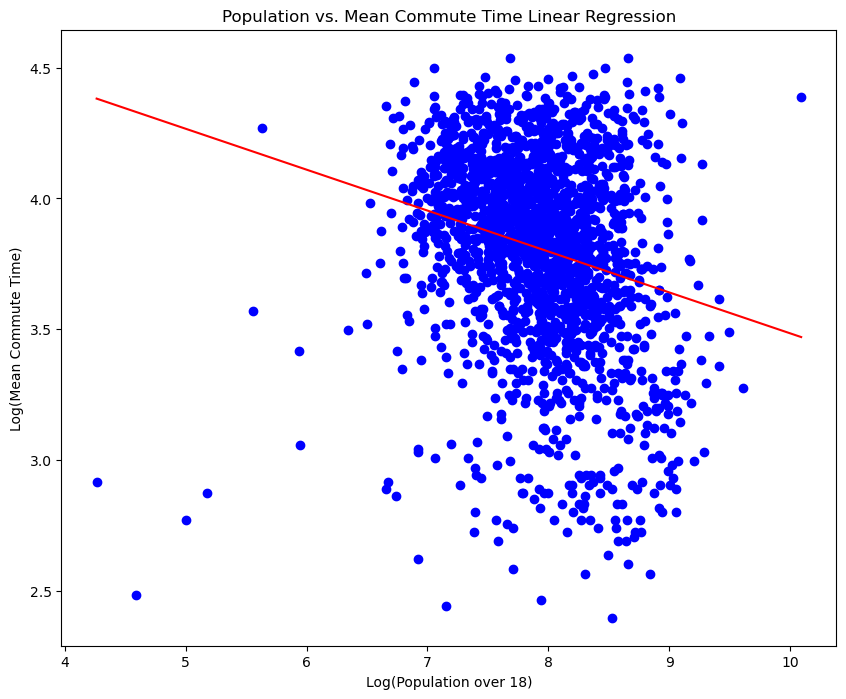

In [27]:
# Conduct linear regression
tract_info = tract_info.sort_values(by = 'Pop_18')

X = np.asarray(np.log(tract_info['Pop_18'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['mean_commute'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Population over 18)')
ax.set_ylabel('Log(Mean Commute Time)')
ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()

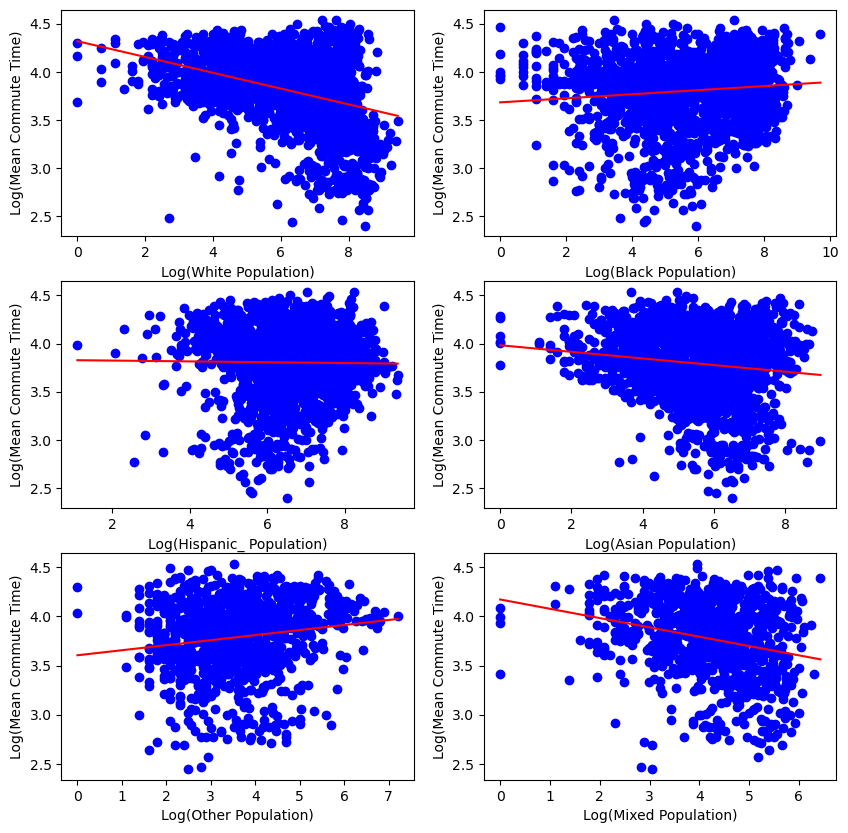

In [28]:
#look by race
race_cols_tots = ['WhiteTot', 'BlackTot', 'Hispanic_Tot', 'AsianTot', 'OtherTot', 'MixedTot']
race_cols_above18 = ['WhiteAbove18', 'BlackAbove18','Hispanic_Above18','AsianAbove18','OtherAbove18', 'MixedAbove18']

fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i, col in enumerate(race_cols_tots):
    name = col[:-3]
    tract_info = tract_info[tract_info[col]>0]
    tract_info = tract_info.sort_values(by = col)

    # Conduct linear regression
    X = np.asarray(np.log(tract_info[col])).reshape(-1, 1)
    y = np.asarray(np.log(tract_info['mean_commute'])).reshape(-1, 1)
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Create scatter plot and legend
    row = i // 2  # integer division to get row index
    col = i % 2   # modulo operator to get column index
    ax[row, col].plot(X, y, 'o', color='blue')
    ax[row, col].plot(X, y_pred, color='red')
    ax[row, col].set_xlabel(f'Log({name} Population)')
    ax[row, col].set_ylabel('Log(Mean Commute Time)')

plt.show()

# Linear Regression of Income and Commute Time

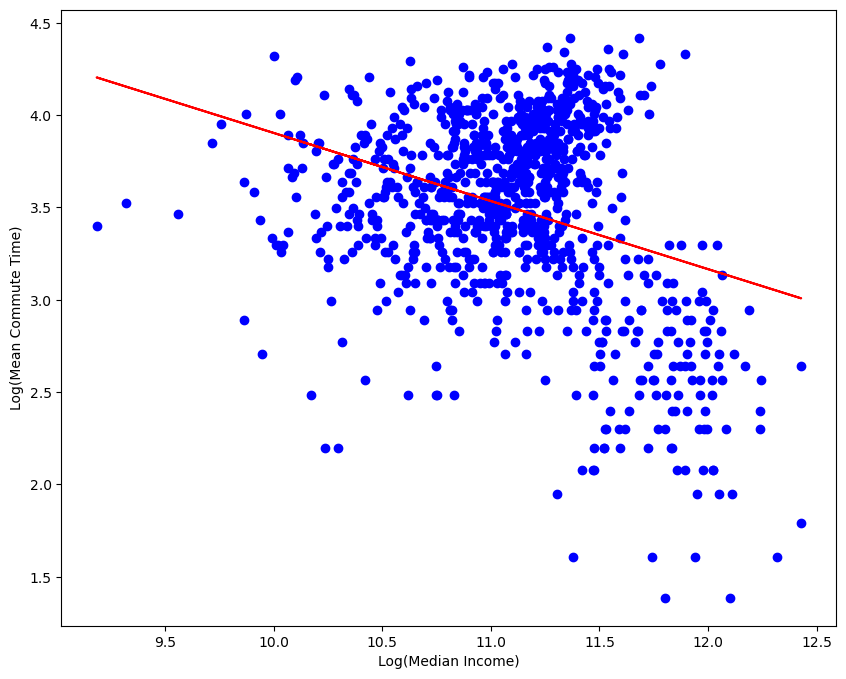

In [29]:
# Conduct linear regression
X = np.asarray(np.log(tract_info['Median_Inc'])).reshape(-1, 1)
y = np.asarray(np.log(tract_info['min_commute'])).reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
coef = regressor.coef_[0][0]
intc = regressor.intercept_[0]
e_intc = np.exp(intc)
r_squared = regressor.score(X, y)

# Create scatter plot and legend
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y,'o', color='blue')
ax.plot(X, y_pred, color='red')
ax.set_xlabel('Log(Median Income)')
ax.set_ylabel('Log(Mean Commute Time)')
# ax.set_title('Population vs. Mean Commute Time Linear Regression')
plt.show()

In [30]:
r_squared

0.10591557171694999

# Look at Commute time distribution for majority white and non-white census tracts

In [44]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

#check if the distribution is normal using one-sample KS test and sample mean-std
def is_normal(x):
        return stats.kstest(x,'norm',args=(x.mean(),x.std()))

In [42]:
white_df = tract_info[tract_info['%White']>50]
nonwhite_df = tract_info[tract_info['%White']<50]
print(len(white_df),len(nonwhite_df))

248 708


Mean = 36.58
Standard deviation = 16.73
1 percentile = 14.35
5 percentile = 16.00
25 percentile = 24.00
50 percentile = 31.62
75 percentile = 48.06
95 percentile = 68.40
99 percentile = 79.55


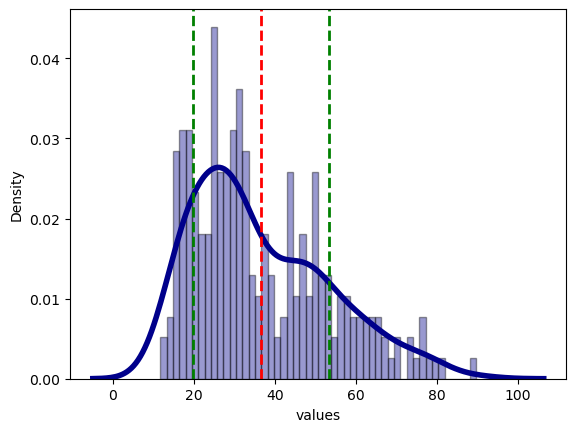

In [67]:
distribution_analysis(white_df['mean_commute'])

Mean = 50.19
Standard deviation = 14.25
1 percentile = 19.52
5 percentile = 28.59
25 percentile = 38.94
50 percentile = 50.00
75 percentile = 60.75
95 percentile = 74.41
99 percentile = 81.98


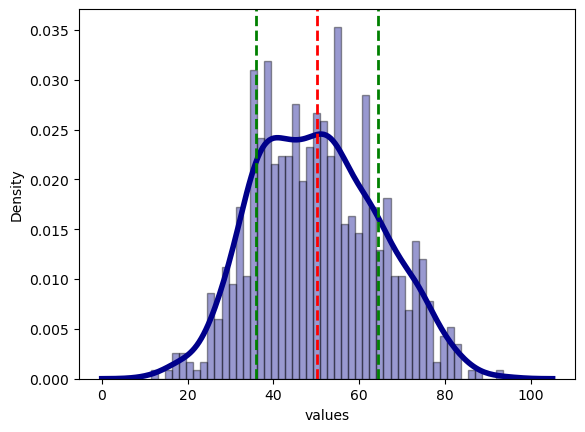

In [68]:
distribution_analysis(nonwhite_df['mean_commute'])

Mean = 27.12
Standard deviation = 16.60
1 percentile = 5.00
5 percentile = 8.00
25 percentile = 14.00
50 percentile = 22.50
75 percentile = 37.00
95 percentile = 59.65
99 percentile = 70.53


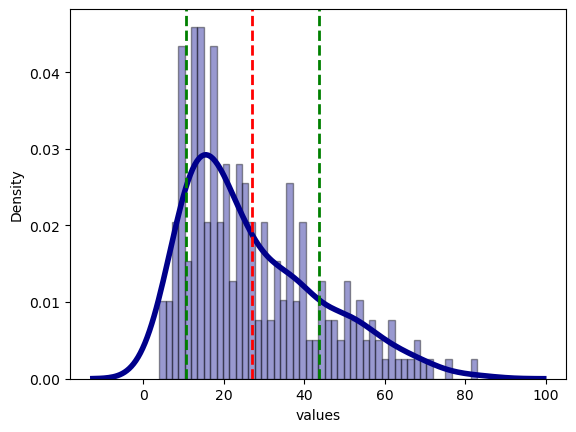

In [69]:
distribution_analysis(white_df['min_commute'])

Mean = 40.65
Standard deviation = 14.28
1 percentile = 12.00
5 percentile = 19.00
25 percentile = 30.00
50 percentile = 40.00
75 percentile = 51.00
95 percentile = 65.65
99 percentile = 72.00


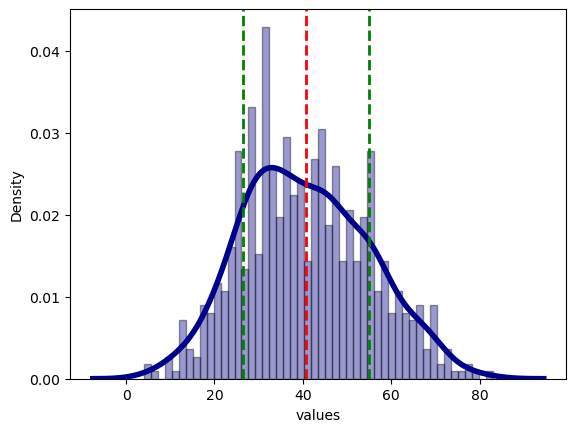

In [70]:
distribution_analysis(nonwhite_df['min_commute'])

In [ ]:
### t-tests the means

In [63]:
from scipy import stats

stats.ttest_ind(white_df['min_commute'],nonwhite_df['min_commute'])

Ttest_indResult(statistic=-12.301750096026637, pvalue=2.184499621670304e-32)

In [64]:
stats.ttest_ind(white_df['mean_commute'],nonwhite_df['mean_commute'])

Ttest_indResult(statistic=-12.351696328869966, pvalue=1.2799979199458173e-32)

In [65]:
### k-s test for distribution
stats.ks_2samp(white_df['min_commute'],nonwhite_df['min_commute'])

KstestResult(statistic=0.43331966466192817, pvalue=1.3440936996738852e-31)

In [66]:
stats.ks_2samp(white_df['mean_commute'],nonwhite_df['mean_commute'])

KstestResult(statistic=0.44728449061417896, pvalue=1.033202442867796e-33)